# Good Practices - Pandas

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import requests

In [13]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [14]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926



left	LEFT OUTER JOIN	        Use keys from left frame only
right	RIGHT OUTER JOIN	    Use keys from right frame only
outer	FULL OUTER JOIN	        Use union of keys from both frames
inner	INNER JOIN	            Use intersection of keys from both frames

In [24]:
inner_merged_df = a_df.merge(b_df, on='Country')
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


In [25]:
left_merged_df = a_df.merge(b_df, on='Country', how="left")
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [26]:
right_merged_df = a_df.merge(b_df, on='Country', how="right")
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


In [28]:
outer_merged_df = a_df.merge(b_df, on='Country', how="outer")
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [29]:
outer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
Country           5 non-null object
Population (M)    4 non-null float64
Capital           4 non-null object
HDI               4 non-null float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


In [32]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [33]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [35]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [36]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


In [49]:
test_df = concat_df.groupby(["Country"])
test_df.sum()

,Population (M),HDI
Country,,
Belgium,11.4,0.916
Canada,0.0,0.926
Finland,5.5,0.000
France,67.2,0.901
Germany,82.8,0.936


## Medals ex

In [279]:
countries_df = pd.read_csv("../notebook/dictionary.csv")

In [280]:
summer_df = pd.read_csv("summer.csv")

In [281]:
countries_df.head(2)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [282]:
summer_df.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [283]:
winter_df = pd.read_csv("winter.csv")

In [284]:
winter_df.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [285]:
countries_df = countries_df.set_index("Code")
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df = summer_df.set_index("Code")
winter_df.rename(columns={"Country": "Code"}, inplace=True)
winter_df = winter_df.set_index("Code")

In [286]:
summer_df["Season"] = "Summer"
winter_df["Season"] = "Winter"

In [287]:
summer_countries_df = countries_df.join(summer_df)

In [288]:
summer_countries_df.head(2)

,Country,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
Code,,,,,,,,,,,,
AFG,Afghanistan,32526562.0,594.323081,2008.0,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
AFG,Afghanistan,32526562.0,594.323081,2012.0,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer


In [289]:
winter_countries_df = countries_df.join(winter_df)

In [290]:
winter_countries_df.head(2)

,Country,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
Code,,,,,,,,,,,,
AFG,Afghanistan,32526562.0,594.323081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AHO,Netherlands Antilles*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
all_df = pd.concat([summer_countries_df, winter_countries_df], axis = "index", sort = True)

In [292]:
all_df

,Athlete,City,Country,Discipline,Event,GDP per Capita,Gender,Medal,Population,Season,Sport,Year
Code,,,,,,,,,,,,
AFG,"NIKPAI, Rohullah",Beijing,Afghanistan,Taekwondo,- 58 KG,594.323081,Men,Bronze,32526562.0,Summer,Taekwondo,2008.0
AFG,"NIKPAI, Rohullah",London,Afghanistan,Taekwondo,58 - 68 KG,594.323081,Men,Bronze,32526562.0,Summer,Taekwondo,2012.0
AHO,"BOERSMA, Jan D.",Seoul,Netherlands Antilles*,Sailing,Board (Division Ii),NaN,Men,Silver,NaN,Summer,Sailing,1988.0
ALB,NaN,NaN,Albania,NaN,NaN,3945.217582,NaN,NaN,2889167.0,NaN,NaN,NaN
ALG,"ZAOUI, Mohamed",Los Angeles,Algeria,Boxing,71-75KG,4206.031232,Men,Bronze,39666519.0,Summer,Boxing,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...
VIE,NaN,NaN,Vietnam,NaN,NaN,2111.138024,NaN,NaN,91703800.0,NaN,NaN,NaN
VIN,NaN,NaN,Saint Vincent and the Grenadines,NaN,NaN,6739.174833,NaN,NaN,109462.0,NaN,NaN,NaN
YEM,NaN,NaN,Yemen,NaN,NaN,1406.291651,NaN,NaN,26832215.0,NaN,NaN,NaN


In [293]:
all_df = all_df[all_df.Medal.notnull()]

In [294]:
all_count_df = all_df[all_df["Year"] >= 1984] .groupby(["Country"]).count()[["Medal"]]

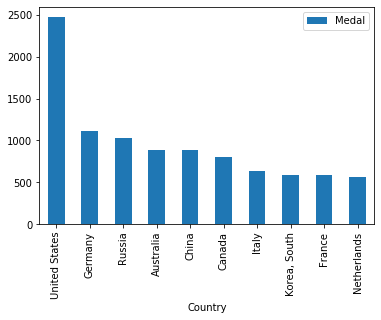

In [295]:
all_count_df.sort_values(by ="Medal", ascending = False).head(10).plot(kind = "bar")

In [296]:
all_df_split = all_df[all_df["Year"] >= 1984] .groupby(["Country", "Season"]).count()[["Medal"]].sort_values(by ="Medal", ascending = False)

In [297]:
all_df_split

,,Medal
Country,Season,
United States,Summer,2087
Australia,Summer,876
China,Summer,807
Germany,Summer,785
Russia,Summer,768
...,...,...
New Zealand,Winter,1
Panama,Summer,1
Senegal,Summer,1


In [298]:
all_df_split = all_df_split.unstack()

In [299]:
all_df_split.fillna(0, inplace = True)

In [309]:
test_df = all_df_split.sort_values(by = [("Medal","Summer"),("Medal", "Winter")], ascending = False)

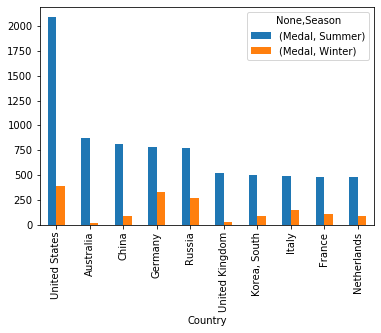

In [310]:
test_df.head(10).plot(kind = "bar")